In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import psycopg2
import pandas.io.sql as psql

In [2]:
conn = psycopg2.connect(user="xxxx",
                        password="xxxx",
                        host="pg.analytics.northwestern.edu",
                        port="5432",
                        database="everything2023")

cursor = conn.cursor()


cursor.execute("SELECT version();")

data = cursor.fetchone()

print("Connection established to: ",data)

Connection established to:  ('PostgreSQL 10.12 on x86_64-pc-linux-gnu, compiled by gcc (GCC) 4.8.5 20150623 (Red Hat 4.8.5-39), 64-bit',)


In [3]:
df_colors = psql.read_sql(""" SELECT "COLOR", COUNT(*)
              FROM group_6.\"SKUINFO\"
              GROUP BY "COLOR"
                """
              , conn)

/var/folders/vs/01r4hdl543543ss6ggd9ld0r0000gn/T/ipykernel_32394/3624536194.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_colors = psql.read_sql(""" SELECT "COLOR", COUNT(*)


In [4]:
df_colors.head(10)

,COLOR,count
0,MADRE/HENNA,1
1,BNTOLV/BLK,4
2,C 10SERUM,1
3,CRIMSON/ST,20
4,CUB BROW Q,18
5,ANTQSLVLTM,11
6,NEW RED SEA,2
7,H PNK/CNRY,1
8,18-CAFE,2
9,434SKY BLUE,12


In [5]:
df_colors = df_colors.sort_values("count", ascending=False)

df_colors.head(10)

,COLOR,count
63037,BLACK,98933
28734,WHITE,42664
18985,NAVY,30521
14091,RED,22840
27666,MULTI,20538
24936,BLUE,20175
38722,BLACK LE,17164
19150,PINK,16624
48686,BROWN,14984
37121,GREY,14102


In [9]:
df_colors["COLOR"] = (df_colors["COLOR"].str.strip() # stripping extra whitespaces
                       .replace('\d+', '', regex = True) # removing digits
                       .replace('\W', '', regex=True) # removing special characters
                       )



df_colors.tail(10)

,COLOR,count
34974,K,1
34981,PINKSCROL,1
34998,BLUEGR,1
34982,VIAL,1
34983,TURQIUOISE,1
34984,ENEWW,1
34988,PETAL,1
34993,HK,1
34994,GA,1
71322,XHRP,1


In [11]:
df_colors.shape[0]

71323

In [12]:
# removing color names that has less frequency than 10
df_colors = df_colors[df_colors["count"] > 10] 

print(df_colors.shape[0])

df_colors.tail(10)

17405


,COLOR,count
48676,ASTORODY,11
5384,MNAVY,11
39679,SPCTATORR,11
16644,DUBLIN,11
15896,BANDANARED,11
53507,PINMLTNVA,11
69111,GRAPECOMB,11
5639,CADILLAC,11
48946,VAMRRDPO,11
29934,EVESTEEL,11


In [13]:
# dropping the count column after filtering the df
df_colors.drop(columns=["count"], inplace = True)

df_colors

,COLOR
63037,BLACK
28734,WHITE
18985,NAVY
14091,RED
27666,MULTI
...,...
53507,PINMLTNVA
69111,GRAPECOMB
5639,CADILLAC
48946,VAMRRDPO


In [14]:
df_colors.reset_index(drop=True, inplace=True)

df_colors.head()

,COLOR
0,BLACK
1,WHITE
2,NAVY
3,RED
4,MULTI


In [15]:
df_colors.to_csv("unique_colors.csv")

In [16]:
df_colors.to_excel("unique_colors.xlsx")

In [17]:
conn.close()

In [18]:
ChatGPT_Demo_Prompt = """

You will be given a csv file that contains an index column and a column of colors that has various detailed color names. 
You will be mapping these specific color names to the closest general and basic colors 
such as: BLACK, WHITE, RED, GREEN, YELLOW, BLUE, BROWN, ORANGE, PINK, PURPLE, GREY.

Examples: 

INDIGO --> BLUE
SILVER --> GREY
GOLD --> YELLOW
KHAKI --> BROWN
PEACH --> ORANGE

The given csv is given in between double quotes:

""
,COLOR,0,BLACK,1,WHITE,2,NAVY, 3,INDIGO,4,OLIVE,5,PEACH,6,CORAL,7,INDIGO,8,CAMEL,9,KHAKI,10,LILAC
""

You will not use any code or programming language for this task.
You will use your own perception of colors and map them to the closest general color.
Have a look at the csv and return your answers back in a csv format.


"""



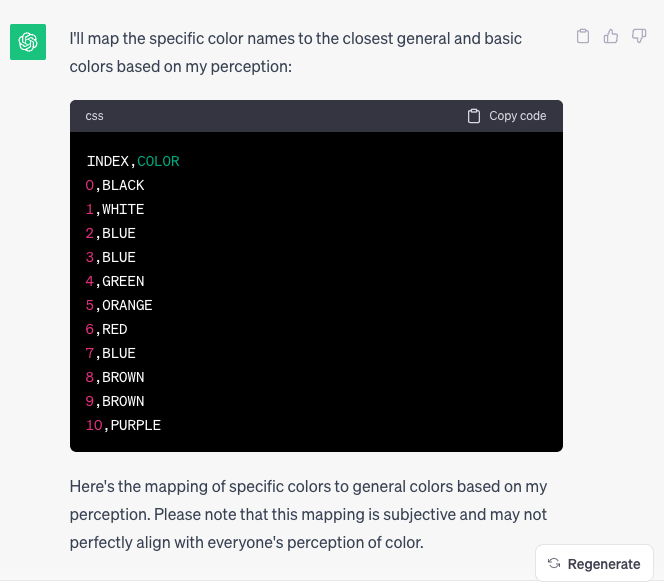